In [30]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.spatial.distance import cdist

In [31]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:  # relative_path should be an r-string
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
ref = pickle_load(r'Data\Dataset\reflectance.pkl')

In [4]:
ref = ref.reshape(ref.shape[0] * ref.shape[1], ref.shape[2])

In [5]:
centers = ref.mean(axis=0)
pickle_save(centers, r'Data\Dataset\channel_centers.pkl')

In [7]:
pca = PCA(n_components=ref.shape[1], whiten=True)
ref_pca = pca.fit_transform(ref)
pickle_save(pca, r'Data\Dataset\Full_PCA\pca_object.pkl')

In [8]:
train = pickle_load(r'Data\Dataset\Splits\reflectance_train.pkl')
val = pickle_load(r'Data\Dataset\Splits\reflectance_val.pkl')
test = pickle_load(r'Data\Dataset\Splits\reflectance_test.pkl')

In [10]:
for split_name, split in zip(['train', 'val', 'test'], [train, val, test]):
    split_flat = split.reshape(
        (split.shape[0] * split.shape[1], split.shape[2])
    )
    split_pca_flat = pca.transform(split_flat)
    split_pca = split_pca_flat.reshape(
        (split.shape[0], split.shape[1], split.shape[2])
    )
    pickle_save(
        split_pca,
        r'Data\Dataset\Splits\reflectance_' + split_name + '_pca244.pkl'
    )

# Kernel PCA

In [6]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='sigmoid')
ref_kpca = kpca.fit(ref[::40, :])
pickle_save(kpca, 'Data\\Split_Data_2\\KPCA\\Sigmoid\\pca_object.pkl')

In [ ]:
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    pickle_save(
        kpca.transform(
            pickle_load(
                f'Data\\Split_Data_2\\List_Data\\reflectance_{num}_list.pkl'
            )
        ),
        f'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_{num}_list.pkl'
    )

In [ ]:
# ref_kpca = kpca.fit_transform(ref)

# saved = 0
# path_template = 'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_(**)_list.pkl'
# for split_num, length in enumerate(lens):
#     pickle_save(
#         ref_pca[saved:saved + length, :8],
#         path_template.replace(
#             '(**)', "0"*(2-len(str(split_num))) + str(split_num)
#         )
#     )
#     saved += length

# Visualization

In [3]:
pca = pickle_load(r'Data\Dataset\Full_PCA\pca_object.pkl')

In [4]:
(
    [(i, sum(pca.explained_variance_ratio_[:i]), pca.explained_variance_ratio_[i-1]) for i in range(1, len(pca.explained_variance_ratio_) + 1)][:]
)

[(1, 0.7286101373529538, 0.7286101373529538),
 (2, 0.9194939236627908, 0.19088378630983704),
 (3, 0.9809315747994207, 0.06143765113662996),
 (4, 0.9935034450177018, 0.012571870218281132),
 (5, 0.995140289157069, 0.0016368441393671892),
 (6, 0.9963334410854461, 0.0011931519283771494),
 (7, 0.9970530235229978, 0.0007195824375517958),
 (8, 0.9976924368611866, 0.0006394133381887241),
 (9, 0.9981989784541686, 0.0005065415929820162),
 (10, 0.99849941080206, 0.0003004323478913769),
 (11, 0.9987501930906995, 0.00025078228863951134),
 (12, 0.9989423633809259, 0.00019217029022642622),
 (13, 0.9991026482245173, 0.00016028484359145286),
 (14, 0.9992344081944406, 0.00013175996992335247),
 (15, 0.9993485784270214, 0.00011417023258080565),
 (16, 0.9994388350548674, 9.025662784597612e-05),
 (17, 0.9995067603211772, 6.792526630986894e-05),
 (18, 0.9995622367410162, 5.5476419838953705e-05),
 (19, 0.99961388116001, 5.164441899381881e-05),
 (20, 0.9996562521729128, 4.237101290273525e-05),
 (21, 0.99969019

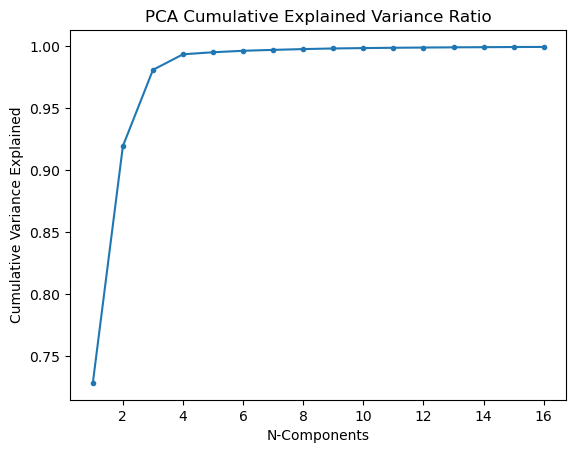

In [6]:
fig, ax = plt.subplots()
ax.set_title('PCA Cumulative Explained Variance Ratio')
ax.plot(
    [i for i in range(1, len(pca.explained_variance_ratio_) + 1)][:16],
    [sum(pca.explained_variance_ratio_[:i])
        for i in range(1, len(pca.explained_variance_ratio_) + 1)
    ][:16],
    marker='.'
)
ax.set_xlabel('N-Components')
ax.set_ylabel('Cumulative Variance Explained')
plt.show(fig)

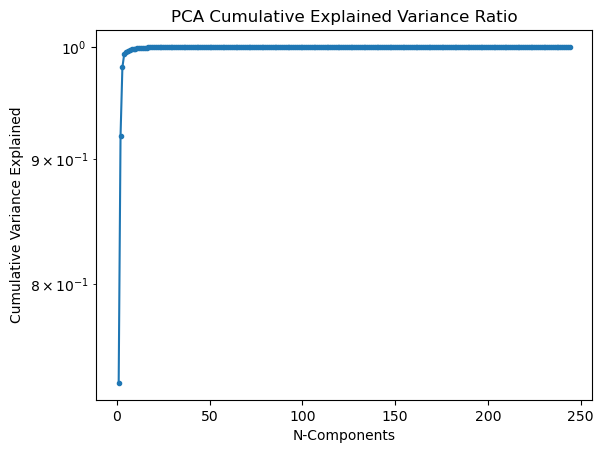

In [7]:
fig, ax = plt.subplots()
ax.set_title('PCA Cumulative Explained Variance Ratio')
ax.semilogy(
    [i for i in range(1, len(pca.explained_variance_ratio_) + 1)][:],
    [sum(pca.explained_variance_ratio_[:i])
        for i in range(1, len(pca.explained_variance_ratio_) + 1)
    ][:],
    marker='.'
)
ax.set_xlabel('N-Components')
ax.set_ylabel('Cumulative Variance Explained')
plt.show(fig)

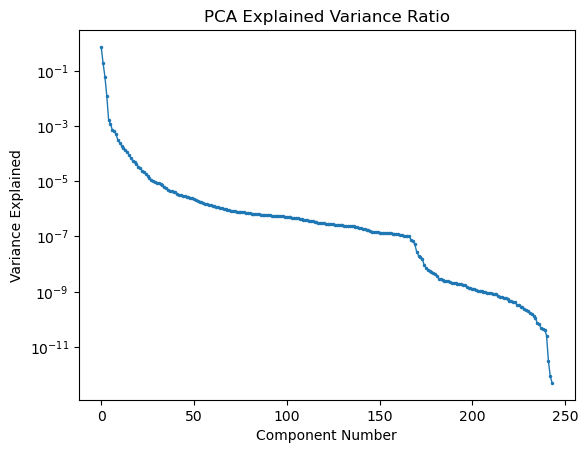

In [9]:
fig, ax = plt.subplots()
ax.set_title('PCA Explained Variance Ratio')
ax.semilogy(pca.explained_variance_ratio_, marker='.', markersize=3, linewidth=1)
ax.set_xlabel('Component Number')
ax.set_ylabel('Variance Explained')
plt.show(fig)

In [13]:
import pandas as pd

pd.DataFrame(
    {
        'Number of Components' : np.arange(1, 245),
        'Cumulative Explained Variance Ratio' : [
                sum(pca.explained_variance_ratio_[:i])
                for i in range(1,len(pca.explained_variance_ratio_) + 1)
        ],
        'Explained Variance Ratio' : pca.explained_variance_ratio_,
    }
).to_csv(join_path('Data\\Split_Data_3\\Full_PCA\\Explained_Variance.csv'))

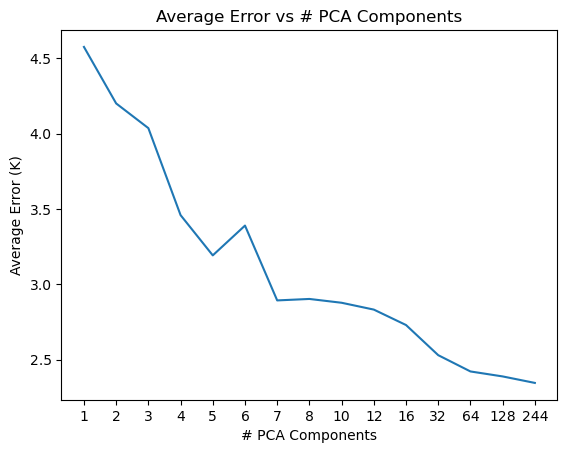

In [27]:
n = [1,2,3,4,8,16,32,64,128,244]
w = 
fig, ax = plt.subplots()
ax.set_title('Average Error vs # PCA Components')
ax.plot(np.arange(1,len(n)+1),w)
ax.set_xlabel('# PCA Components')
ax.set_ylabel('Average Error (K)')
ax.set_xticks(np.arange(1,len(n)+1))
ax.set_xticklabels(n)
plt.show(fig)

# Evaluation

In [3]:
def evaluate_PCA_reconstructions(ref, ref_recon, n, plot=False, text=False):
    print(f'\nN = {n}')
    
    rmse_244 = np.mean(((ref - ref_recon)**2)**(1/2), axis=0)
    rmse = rmse_244.mean()
    
    if text:
        print(
            f'RMSE for true spectra and {n}-component PCA reconstructions: {rmse}'
        )

    if plot:
        fig, ax = plt.subplots()
        ax.set_title(
            f'RMSE for {n}-component PCA reconstructions, average RMSE = {rmse:.6}'
        )
        ax.set_xlabel('wavelength index')
        ax.set_ylabel('RMSE')
        ax.plot(rmse_244)
        ax.set_xlim(1, 244)
        plt.show(fig)


    cos_dist_244 = cdist(ref[:1000, :], ref_recon[:1000, :], 'cosine')
    cos_dist_244 = np.diag(cos_dist_244)
    cos_dist = cos_dist_244.mean()

    if text:
        print(
            'Mean cosine distance between true spectra and {n}-component',
            f'PCA reconstruction for first 1000 data points: {cos_dist}'
        )

    if plot:
        fig, ax = plt.subplots()
        ax.set_title(
            'Cosine distances for first 1000 {n}-component spectral '
            f'reconstructions, mean={cos_dist:.6}'
        )
        ax.set_xlabel('reconstruction example number')
        ax.set_xlim(1, 1000)
        ax.scatter(np.arange(len(cos_dist_244)), cos_dist_244, s=5, alpha=0.3)
        plt.show(fig)


    r2_244 = r2_score(ref, ref_recon, multioutput='raw_values')
    r2 = r2_244.mean()
    
    if text:
        print(
            f'R^2 for true spectra and {n}-component PCA reconstruction: {r2}'
        )

    if plot:
        fig, ax = plt.subplots()
        ax.set_title(
            f'R^2 for {n}-component PCA reconstructions, average R^2 = {r2:.6}'
        )
        ax.set_xlabel('wavelength index')
        ax.set_ylabel('R^2')
        ax.plot(r2_244)
        ax.set_xlim(1, 244)
        plt.show(fig)
    
    return rmse, cos_dist, r2

In [32]:
ref = pickle_load(r'Data\Dataset\reflectance.pkl')
ref = ref.reshape(ref.shape[0] * ref.shape[1], ref.shape[2])

In [20]:
temp = pickle_load(r'Data\Dataset\temp.pkl')[:768, :]
elev = pickle_load(r'Data\Dataset\elevation.pkl')[:768, :]

In [33]:
# ns = [1, 2, 3, 4]#, 5, 6, 7, 8, 10, 12, 16, 20, 25, 32, 42, 48, 64, 128, 200, 244]
ns = [244]

for i, n_components in enumerate(ns):
    pca = PCA(n_components=n_components, whiten=True)
    ref_pca = pca.fit_transform(ref)
    # ref_recon = pca.inverse_transform(ref_pca)
    # vals[i, :] = evaluate_PCA_reconstructions(
    #     ref, ref_recon, n_components, plot=False, text=False
    # )

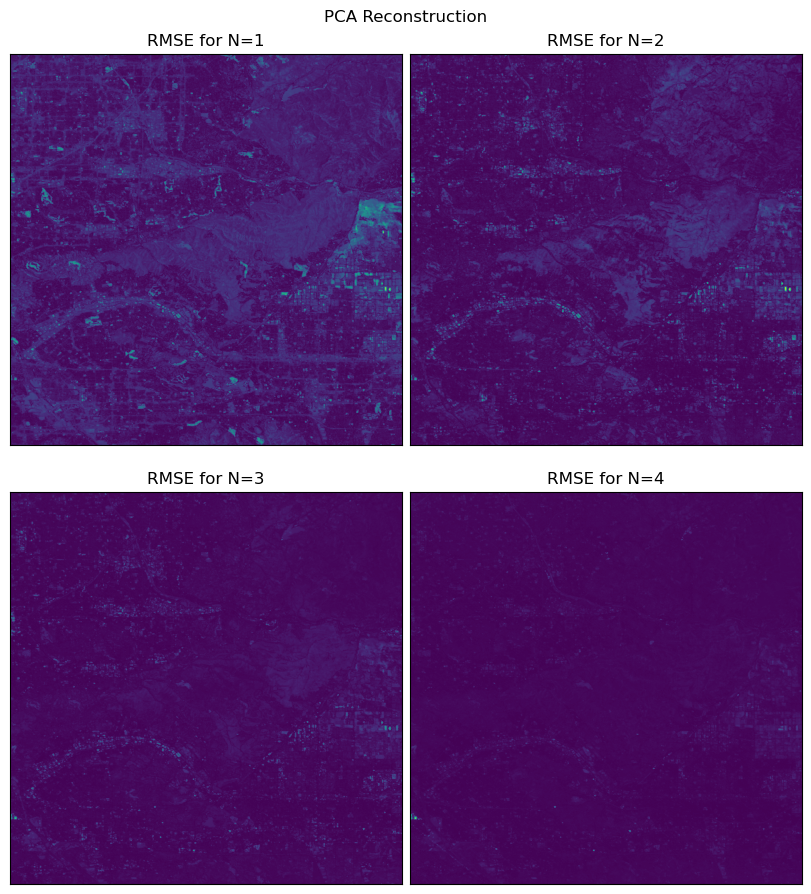

In [62]:
# ref = pickle_load(r'Data\Collapsed_Data\for_dim_reduction.pkl')
ref = pickle_load(r'Data\Dataset\reflectance.pkl')[:768, :, :]
ref = ref.reshape((ref.shape[0] * ref.shape[1], ref.shape[2]))

vals = np.empty((len(ns), 3))

fig, axs = plt.subplots(2,2, figsize=(8,9), layout='constrained')
fig.suptitle('PCA Reconstruction')
axs[0,0].set_title('RMSE for N=1')
axs[0,0].set_xticks([],[])
axs[0,0].set_yticks([],[])
axs[0,1].set_title('RMSE for N=2')
axs[0,1].set_xticks([],[])
axs[0,1].set_yticks([],[])
axs[1,0].set_title('RMSE for N=3')
axs[1,0].set_xticks([],[])
axs[1,0].set_yticks([],[])
axs[1,1].set_title('RMSE for N=4')
axs[1,1].set_xticks([],[])
axs[1,1].set_yticks([],[])

l = np.array(l)
for i, n_components in enumerate(ns):
    axs[i//2,i%2].imshow(
        (((ref - l[i,:,:])**2).mean(axis=1)**0.5).reshape((768, 768)),
        # vmin=0,
        # vmax=l.mean(axis=2).max(),
    )

plt.show(fig)
# df = pd.DataFrame(
#     {
#         'N': ns,
#         'RMSE': vals[:, 0],
#         'Cosine Distance': vals[:, 1],
#         'R^2': vals[:, 2],
#     }
# )

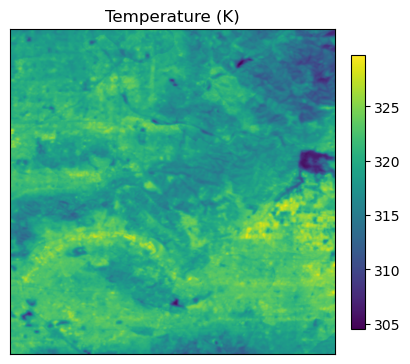

In [60]:
fig, ax = plt.subplots(figsize=(4,4), layout='constrained')
ax.set_title('Temperature (K)')
ax.matshow(temp)
ax.set_xticks([],[])
ax.set_yticks([],[])
plt.imshow(temp)
plt.colorbar(fraction=0.05, shrink=0.7)
plt.show(fig)

In [91]:
np.random.default_rng().choice(ref_pca, 100, axis=0)[:, :n].shape

(100, 64)

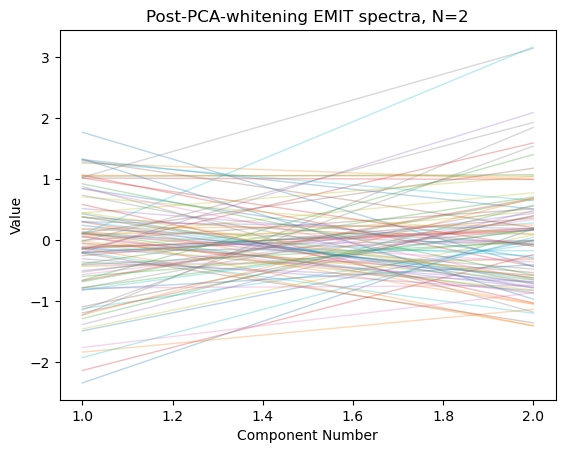

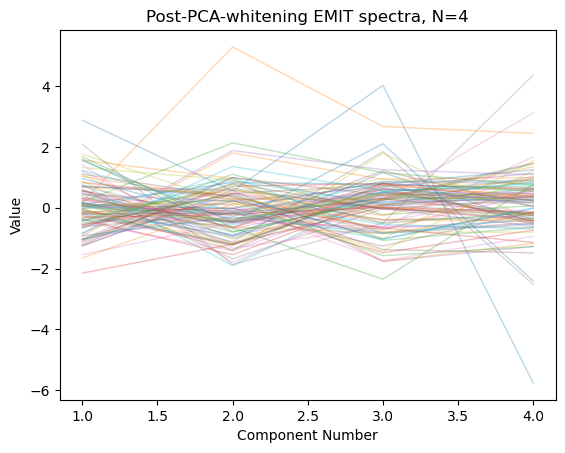

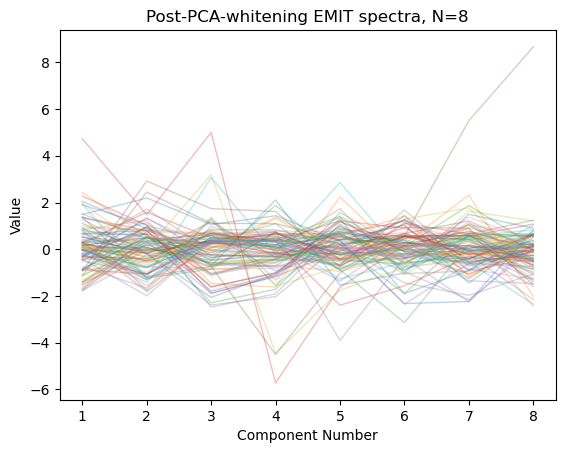

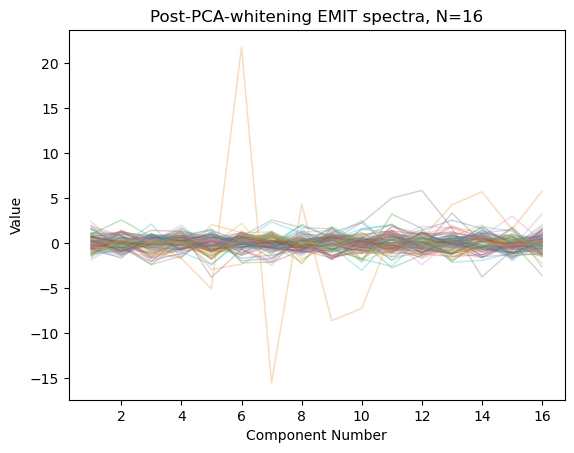

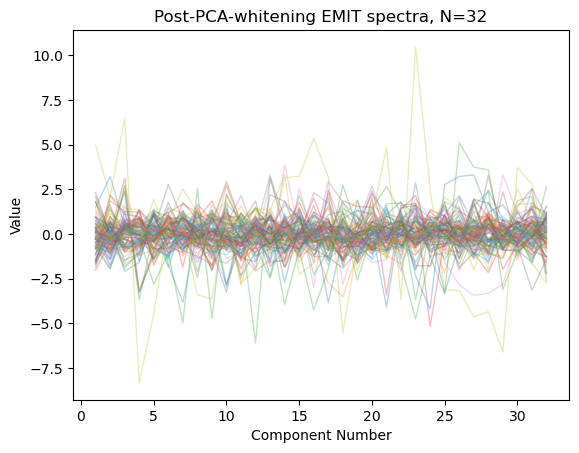

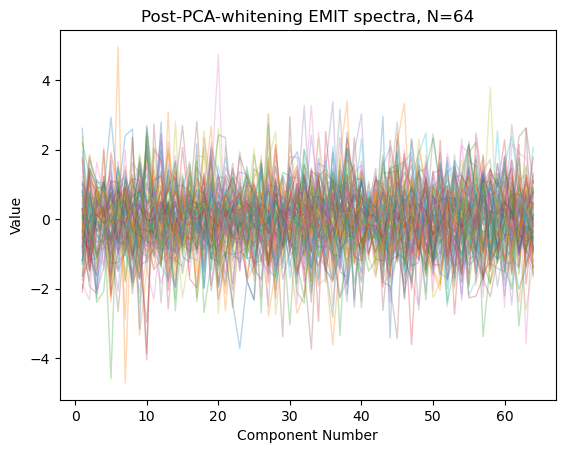

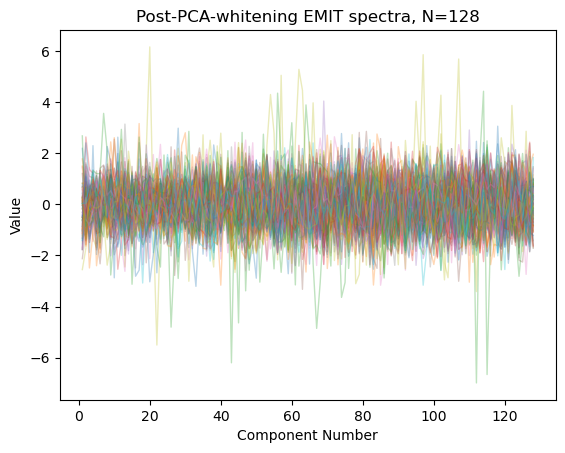

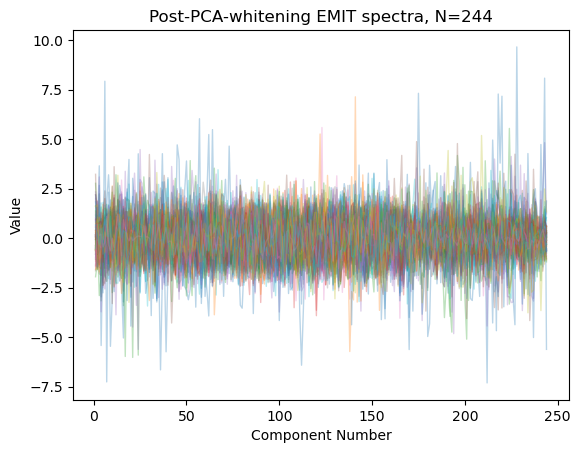

In [34]:
for n in [2,4,8,16,32,64,128,244]:
    fig, ax = plt.subplots()
    plt.plot(np.arange(1, n+1), np.random.default_rng().choice(ref_pca, 100, axis=0)[:, :n].T, linewidth=1, alpha=0.3)
    ax.set_title(f'Post-PCA-whitening EMIT spectra, N={n}')
    ax.set_xlabel('Component Number')
    ax.set_ylabel('Value')
    plt.show(fig)